D = 1, x = [0,1].
Inital conditions u(x) = 0.5*(cos(13*x)+1)
Bondry conditions x[0] = 1, x[1] = 0

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0


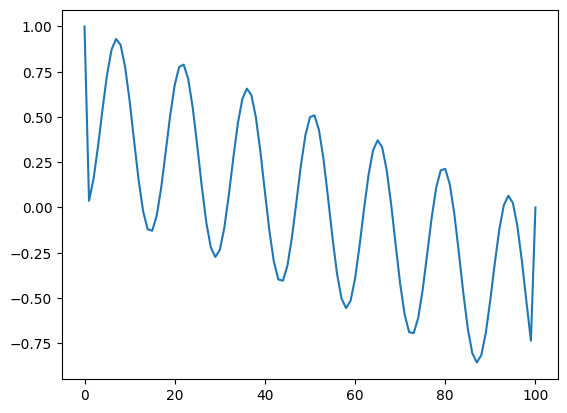

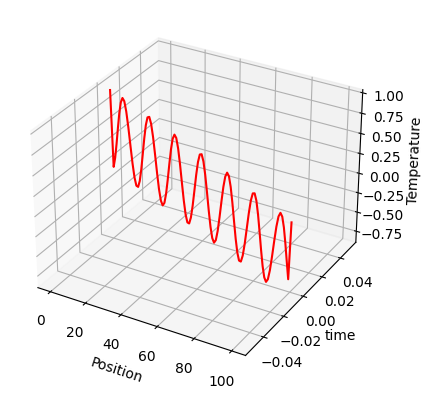

finished


In [22]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# HeatCNTridiag.py:  solution of heat eqtn via CN method	 

import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D ;
from numpy import *;
import numpy;



def Tridiag(a, d, c, b, Ta, Td, Tc, Tb, x, n):     
    Max = n+1
    h = zeros( (Max), float )
    p = zeros( (Max), float )
    for i in range(1,n):
        a[i] = Ta[i]
        b[i] = Tb[i]
        c[i] = Tc[i]
        d[i] = Td[i]
    h[1] = c[1]/d[1]
    p[1] = b[1]/d[1]
    for i in range(2,n):
         h[i] = c[i] / (d[i]-a[i]*h[i-1])
         p[i] = (b[i] - a[i]*p[i-1]) / (d[i]-a[i]*h[i-1])
    x[n] = 0
    for i in range( n - 1, 0,-1 ): x[i] = p[i] - h[i]*x[i+1]
        
        
Nx=101;      tend=1.; Dt=5.2;  Dtout=100.;     Dx = 0.01;                                                            
KAPPA = 210.; SPH = 900.; RHO = 2700. # Conductivity, specf heat, density                                                      
T = zeros(Nx,float);  Tp = zeros((Nx,int(tend/Dtout)+1),float)  
                 

for ix in range (1, Nx - 1):  
    print(ix)
    T[ix] = 0.5*(math.cos(13*ix)+1);               # Initial T
T[0] = 1                     # 1st & last T = 0
T[Nx-1] = 0. 
cons = 1*Dt/(Dx*Dx);                             # constant eta
m = 1      

n   = 100;   m = 100
Ta  = zeros((Nx),float); Tb =zeros((Nx),float); Tc = zeros((Nx),float)
Td  = zeros((Nx),float); a = zeros((Nx),float); b = zeros((Nx),float)
c   = zeros((Nx),float); d = zeros((Nx),float); x = zeros((Nx),float)

for i in range(1, n+1):  Td[i] = 2. + 2./cons
for i in range(1, n+1):  Ta[i] = -1.0;      Tc[i] = -1.0;     # Off diagonal

toutn=0
t=0.
while t < tend:     
    for i in range(1,n): Tb[i] = T[i-1] + (2./cons-2)*T[i] + T[i+1] # write one line of code using T[i-1], T[i], T[i+1] to finish the calculation of b
    Tridiag(a, d, c, b, Ta, Td, Tc, Tb, x, n)            # Solve system
    for i in range(1, n+1):  T[i] = x[i]                                                                                 
    t+=Dt
    
    if t >= toutn*Dtout: # store the T that will be plotted
        p.plot(T)
        Tp[:,toutn] = T[:]   
        print(toutn)   
        toutn += 1  

        
# following is for the plot
x = list(range(0, Nx))                       # Plot alternate pts
y = list(range(0, int(tend/Dtout)+1))                      
X, Y = p.meshgrid(x, y)                       

# for the wireframe plot
def functz(Tpl):                            
    z = Tpl[X, Y]       
    return z

Z = functz(Tp)              
fig = p.figure()                                          # Create figure
ax = fig.add_subplot(projection='3d')                                      
ax.plot_wireframe(X, Y, Z, color = 'r')               
ax.set_xlabel('Position')                                     
ax.set_ylabel('time')
ax.set_zlabel('Temperature')
p.show()                               
print("finished")    





Tend set to 10000

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


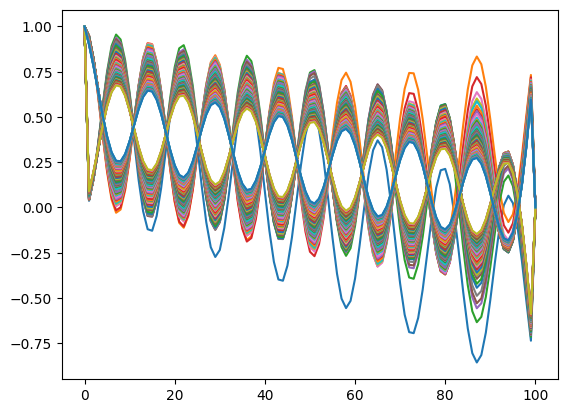

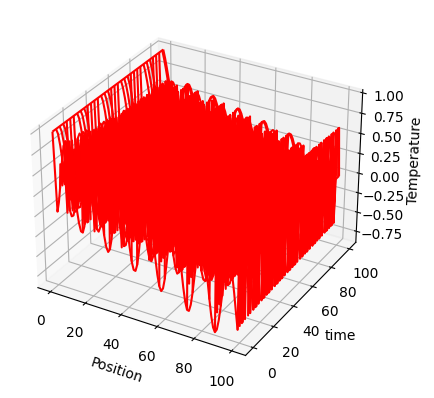

finished


In [23]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# HeatCNTridiag.py:  solution of heat eqtn via CN method	 

import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D ;
from numpy import *;
import numpy;



def Tridiag(a, d, c, b, Ta, Td, Tc, Tb, x, n):     
    Max = n+1
    h = zeros( (Max), float )
    p = zeros( (Max), float )
    for i in range(1,n):
        a[i] = Ta[i]
        b[i] = Tb[i]
        c[i] = Tc[i]
        d[i] = Td[i]
    h[1] = c[1]/d[1]
    p[1] = b[1]/d[1]
    for i in range(2,n):
         h[i] = c[i] / (d[i]-a[i]*h[i-1])
         p[i] = (b[i] - a[i]*p[i-1]) / (d[i]-a[i]*h[i-1])
    x[n] = 0
    for i in range( n - 1, 0,-1 ): x[i] = p[i] - h[i]*x[i+1]
        
        
Nx=101;      tend=10000.; Dt=5.2;  Dtout=100.;     Dx = 0.01;                                                            
KAPPA = 210.; SPH = 900.; RHO = 2700. # Conductivity, specf heat, density                                                      
T = zeros(Nx,float);  Tp = zeros((Nx,int(tend/Dtout)+1),float)  
                 

for ix in range (1, Nx - 1):  
    print(ix)
    T[ix] = 0.5*(math.cos(13*ix)+1);               # Initial T
T[0] = 1                     # 1st & last T = 0
T[Nx-1] = 0. 
cons = 1*Dt/(Dx*Dx);                             # constant eta
m = 1      

n   = 100;   m = 100
Ta  = zeros((Nx),float); Tb =zeros((Nx),float); Tc = zeros((Nx),float)
Td  = zeros((Nx),float); a = zeros((Nx),float); b = zeros((Nx),float)
c   = zeros((Nx),float); d = zeros((Nx),float); x = zeros((Nx),float)

for i in range(1, n+1):  Td[i] = 2. + 2./cons
for i in range(1, n+1):  Ta[i] = -1.0;      Tc[i] = -1.0;     # Off diagonal

toutn=0
t=0.
while t < tend:     
    for i in range(1,n): Tb[i] = T[i-1] + (2./cons-2)*T[i] + T[i+1] # write one line of code using T[i-1], T[i], T[i+1] to finish the calculation of b
    Tridiag(a, d, c, b, Ta, Td, Tc, Tb, x, n)            # Solve system
    for i in range(1, n+1):  T[i] = x[i]                                                                                 
    t+=Dt
    
    if t >= toutn*Dtout: # store the T that will be plotted
        p.plot(T)
        Tp[:,toutn] = T[:]   
        print(toutn)   
        toutn += 1  

        
# following is for the plot
x = list(range(0, Nx))                       # Plot alternate pts
y = list(range(0, int(tend/Dtout)+1))                      
X, Y = p.meshgrid(x, y)                       

# for the wireframe plot
def functz(Tpl):                            
    z = Tpl[X, Y]       
    return z

Z = functz(Tp)              
fig = p.figure()                                          # Create figure
ax = fig.add_subplot(projection='3d')                                      
ax.plot_wireframe(X, Y, Z, color = 'r')               
ax.set_xlabel('Position')                                     
ax.set_ylabel('time')
ax.set_zlabel('Temperature')
p.show()                               
print("finished")    



